0. Author: Md Rakib Hasan
1. Date: 24-3-2023

# Project Name: Mexico Toy Sales Analysis

Sales & inventory data for a fictitious chain of toy stores in Mexico called Maven Toys, including information about products, stores, daily sales transactions, and current inventory levels at each location.


# Problem Statment

1. Which product categories drive the biggest profits? Is this the same across store locations?

2. Can you find any seasonal trends or patterns in the sales data?

3. Importnt Business KPI

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
inventory=pd.read_csv(r"F:\Data Analyst\Project\Mexico Toy Analysis\Dataset\inventory.csv")
product=pd.read_csv(r"F:\Data Analyst\Project\Mexico Toy Analysis\Dataset\products.csv")
sales=pd.read_csv(r"F:\Data Analyst\Project\Mexico Toy Analysis\Dataset\sales.csv")
store=pd.read_csv(r"F:\Data Analyst\Project\Mexico Toy Analysis\Dataset\stores.csv")

In [12]:
df1=pd.merge(sales,product,on='Product_ID',how='left')

In [15]:
df2=pd.merge(df1,store,on='Store_ID',how='left')

In [18]:
df2

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2017-01-01,28,1,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2017-01-01,6,8,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2017-01-01,48,7,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2018-09-30,16,35,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2018-09-30,22,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2018-09-30,13,2,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


# Understand Data

In [21]:
# show first five rows
df2.head(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2017-01-01,28,1,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2017-01-01,6,8,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2017-01-01,48,7,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27


In [23]:
# show last five rows
df2.tail(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
829257,829258,2018-09-30,24,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2018-09-30,16,35,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2018-09-30,22,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2018-09-30,13,2,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30
829261,829262,2018-09-30,32,6,1,Colorbuds,Electronics,$6.99,$14.99,Maven Toys Hermosillo 1,Hermosillo,Residential,2012-08-31


In [24]:
# show random five rows
df2.sample(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
270459,270460,2017-09-06,10,31,1,Splash Balls,Sports & Outdoors,$7.99,$8.99,Maven Toys Campeche 1,Campeche,Downtown,2005-01-14
15178,15179,2017-01-16,15,7,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Tuxtla Gutierrez 1,Tuxtla Gutierrez,Downtown,2007-03-05
522980,522981,2018-03-14,8,31,1,Splash Balls,Sports & Outdoors,$7.99,$8.99,Maven Toys Pachuca 1,Pachuca,Downtown,2004-10-14
384968,384969,2017-12-09,12,16,1,Jenga,Games,$2.99,$9.99,Maven Toys Chetumal 1,Chetumal,Downtown,2006-05-05
365889,365890,2017-11-25,19,23,1,Mr. Potatohead,Toys,$4.99,$9.99,Maven Toys Puebla 1,Puebla,Commercial,2008-12-16


In [25]:
# show data shape
df2.shape

(829262, 13)

In [26]:
# show columns
df2.columns

Index(['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units', 'Product_Name',
       'Product_Category', 'Product_Cost', 'Product_Price', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date'],
      dtype='object')

In [28]:
# show data types
df2.dtypes

Sale_ID              int64
Date                object
Store_ID             int64
Product_ID           int64
Units                int64
Product_Name        object
Product_Category    object
Product_Cost        object
Product_Price       object
Store_Name          object
Store_City          object
Store_Location      object
Store_Open_Date     object
dtype: object

In [29]:
# show basic info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829262 entries, 0 to 829261
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sale_ID           829262 non-null  int64 
 1   Date              829262 non-null  object
 2   Store_ID          829262 non-null  int64 
 3   Product_ID        829262 non-null  int64 
 4   Units             829262 non-null  int64 
 5   Product_Name      829262 non-null  object
 6   Product_Category  829262 non-null  object
 7   Product_Cost      829262 non-null  object
 8   Product_Price     829262 non-null  object
 9   Store_Name        829262 non-null  object
 10  Store_City        829262 non-null  object
 11  Store_Location    829262 non-null  object
 12  Store_Open_Date   829262 non-null  object
dtypes: int64(4), object(9)
memory usage: 88.6+ MB


# Data Cleaning

In [60]:
# copy dataset\
df=df2.copy()

In [61]:
# drop unwanted columns
df.drop(columns=['Store_Open_Date'],axis=1,inplace=True)

In [62]:
# change date columns data types
df['Date']=pd.to_datetime(df['Date'])

In [63]:
# check duplicated value
df.duplicated().sum()

0

In [64]:
# check null value
df.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
dtype: int64

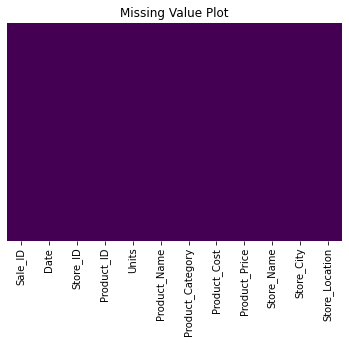

In [65]:
# plot missing value heatmap
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.title('Missing Value Plot');

In [66]:
#chek data types
df.dtypes

Sale_ID                      int64
Date                datetime64[ns]
Store_ID                     int64
Product_ID                   int64
Units                        int64
Product_Name                object
Product_Category            object
Product_Cost                object
Product_Price               object
Store_Name                  object
Store_City                  object
Store_Location              object
dtype: object

In [73]:
df3['Product_Price'].unique()

array(['12.99 ', '15.99 ', '6.99 ', '39.99 ', '8.99 ', '9.99 ', '10.99 ',
       '19.99 ', '4.99 ', '24.99 ', '7.99 ', '25.99 ', '14.99 ', '2.99 ',
       '3.99 ', '5.99 ', '20.99 ', '11.99 '], dtype=object)

In [68]:
df3=df.copy()

In [69]:
df3['Product_Cost']=df3['Product_Cost'].str.split('$').str[1]

In [72]:
df3['Product_Price']=df3['Product_Price'].str.split('$').str[1]

In [75]:
# change data type
df3['Product_Cost']=df3['Product_Cost'].astype('float')
df3['Product_Price']=df3['Product_Price'].astype('float')

In [77]:
df=df3.copy()

In [79]:
df['Store_Location'].unique()

array(['Downtown', 'Commercial', 'Residential', 'Airport'], dtype=object)

In [84]:
df['Product_Price'].dtypes

dtype('float64')

# Data Preprocessing & Feature Engineering

In [86]:
df['Sales']=df['Product_Price']*df['Units']

In [91]:
df['Year']=df['Date'].dt.year

In [96]:
df['Day']=df['Date'].dt.day_name()

In [99]:
df['Month']=df['Date'].dt.month_name()

In [101]:
df['Cost']=df['Product_Cost']*df['Units']

In [103]:
df['Profit']=df['Sales']-df['Cost']

In [112]:
# drop unwanted columns
df.drop(columns=['Date'],axis=1,inplace=True)

In [113]:
df.head(2)

,Sale_ID,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Sales,Year,Day,Month,Cost,Profit
0,1,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,12.99,2017,Sunday,January,9.99,3.0
1,2,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,15.99,2017,Sunday,January,9.99,6.0


In [114]:
df.to_csv(r"F:\Data Analyst\Project\Mexico Toy Analysis\Dataset\clean_data.csv")

In [115]:
num=df.select_dtypes(include=[np.number]).columns

In [116]:
cat=df.select_dtypes(exclude=[np.number]).columns

# Exploratory Data Analysis


Total Sales

In [135]:
total_sales=df['Sales'].sum().round(2)
total_sales

14444572.35

Total Profit

In [136]:
total_profit=df['Profit'].sum().round(2)
total_profit

4014029.0

Profit Margin

In [140]:
profit_margin=(total_profit/total_sales)*100
profit_margin.round(2)

27.79

Gross Profit

In [143]:
gross_profit=total_sales-df['Cost'].sum()
gross_profit.round(2)

4014029.0

In [144]:
df.head(2)

,Sale_ID,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Sales,Year,Day,Month,Cost,Profit
0,1,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,12.99,2017,Sunday,January,9.99,3.0
1,2,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,15.99,2017,Sunday,January,9.99,6.0


Sales & Profit by Month

In [302]:
sale=df.groupby('Month')['Sales'].sum().reset_index()
sale

,Month,Sales
0,April,1508764.05
1,August,1150299.80
2,December,877203.69
3,February,1263983.84
4,January,1289751.13
5,July,1384383.09
6,June,1470279.47
7,March,1473000.83
8,May,1497689.39
9,November,661304.15


Profit By Month

In [301]:
profit=df.groupby('Month')['Profit'].sum().reset_index()
profit

,Month,Profit
0,April,405195.0
1,August,333969.0
2,December,246078.0
3,February,351175.0
4,January,372200.0
5,July,386729.0
6,June,397027.0
7,March,405901.0
8,May,397241.0
9,November,192873.0


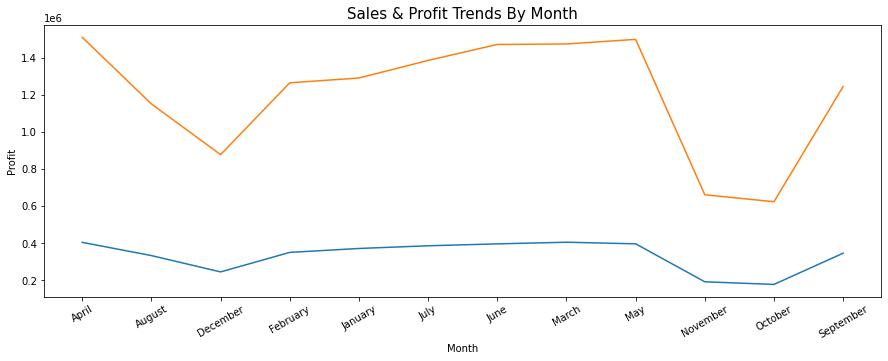

In [303]:
plt.figure(figsize=(15,5))
ax=sns.lineplot(data=profit,x=profit['Month'],y=profit['Profit'])
ax=sns.lineplot(data=sale,x=sale['Month'],y=sale['Sales'])
plt.xticks(rotation=30)
plt.title('Sales & Profit Trends By Month',fontsize=15)
for i in ax.containers:
    ax.line(i,)

Sales & Profit by Day

In [268]:
sale=df.groupby('Day')['Sales'].sum().sort_values(ascending=False).reset_index()
sale

,Day,Sales
0,Sunday,2860193.51
1,Saturday,2750302.26
2,Friday,2183641.79
3,Monday,1749744.00
4,Thursday,1732068.59
5,Wednesday,1637492.19
6,Tuesday,1531130.01


In [272]:
profit=df.groupby('Day')['Profit'].sum().sort_values(ascending=False).reset_index()
profit


,Day,Profit
0,Sunday,770739.0
1,Saturday,741614.0
2,Friday,609542.0
3,Monday,505098.0
4,Thursday,486266.0
5,Wednesday,460857.0
6,Tuesday,439913.0


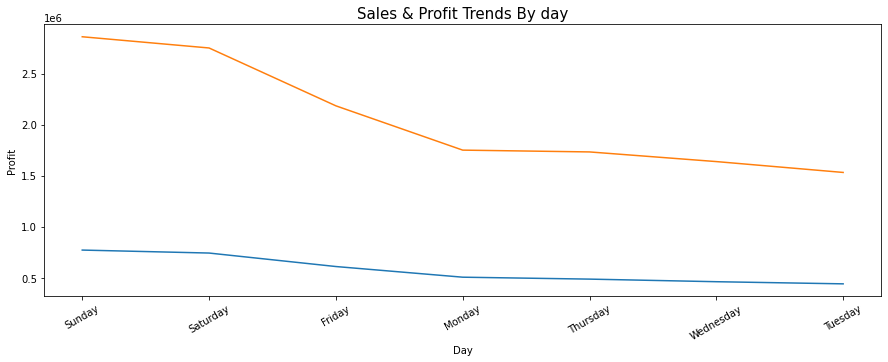

In [273]:
plt.figure(figsize=(15,5))
ax=sns.lineplot(data=profit,x=profit['Day'],y=profit['Profit'])
ax=sns.lineplot(data=sale,x=sale['Day'],y=sale['Sales'])
plt.xticks(rotation=30)
plt.title('Sales & Profit Trends By day',fontsize=15)
for i in ax.containers:
    ax.line(i,)

Product Category by Profit

In [276]:
cat_pro=df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
cat_pro

Product_Category
Toys                 1079527.0
Electronics          1001437.0
Art & Crafts          753354.0
Games                 673993.0
Sports & Outdoors     505718.0
Name: Profit, dtype: float64

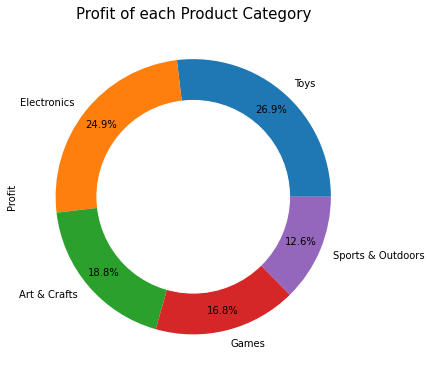

In [277]:
fig, ax=plt.subplots(figsize=(6,6))
#label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
cat_pro.plot(kind='pie',autopct="%1.1f%%",pctdistance=0.85)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.tight_layout()
ax.set_title('Profit of each Product Category',fontsize=15);

Sales of each Product Category

In [193]:
cat_pro=df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False)
cat_pro

Product_Category
Toys                 5093241.00
Art & Crafts         2705364.26
Electronics          2246771.25
Games                2226836.27
Sports & Outdoors    2172359.57
Name: Sales, dtype: float64

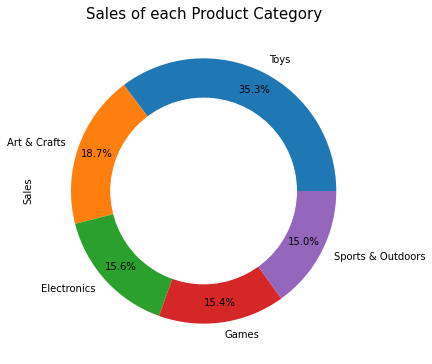

In [195]:
fig, ax=plt.subplots(figsize=(6,6))
#label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
cat_pro.plot(kind='pie',autopct="%1.1f%%",pctdistance=0.85)
circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.tight_layout()
ax.set_title('Sales of each Product Category',fontsize=15);

Profit by Product Category of Each Location

In [279]:
data=df.groupby(['Product_Category','Store_Location'])['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
data

,Product_Category,Store_Location,Profit
18,Toys,Downtown,630029.0
6,Electronics,Downtown,502490.0
2,Art & Crafts,Downtown,444320.0
10,Games,Downtown,378421.0
14,Sports & Outdoors,Downtown,293468.0
5,Electronics,Commercial,287574.0
17,Toys,Commercial,225034.0
1,Art & Crafts,Commercial,155461.0
9,Games,Commercial,146296.0
19,Toys,Residential,136214.0


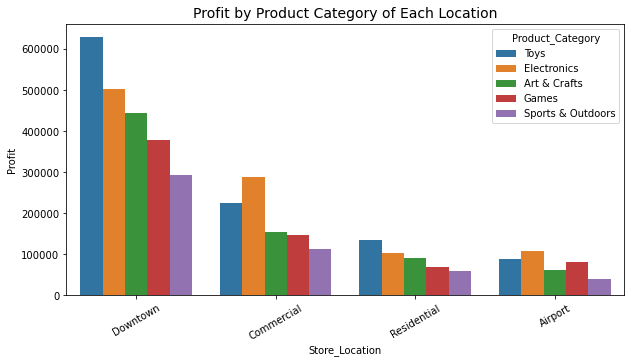

In [282]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=data,x=data['Store_Location'],y=data['Profit'],hue=data['Product_Category'])
plt.xticks(rotation=30)
plt.title('Profit by Product Category of Each Location',fontsize=14);

In [192]:
df.head(2)

,Sale_ID,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Sales,Year,Day,Month,Cost,Profit
0,1,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,12.99,2017,Sunday,January,9.99,3.0
1,2,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,15.99,2017,Sunday,January,9.99,6.0


Top 10 Store City By Sales

In [283]:
top_10_city_sale=df.groupby("Store_City")['Sales'].sum().sort_values(ascending=False).reset_index()[:10]
top_10_city_sale

,Store_City,Sales
0,Cuidad de Mexico,1649492.01
1,Guadalajara,1322099.46
2,Monterrey,1261845.70
3,Hermosillo,903388.84
4,Guanajuato,869055.83
5,Puebla,808710.29
6,Toluca,633521.68
7,Xalapa,610119.77
8,Mexicali,586175.85
9,Saltillo,579514.97


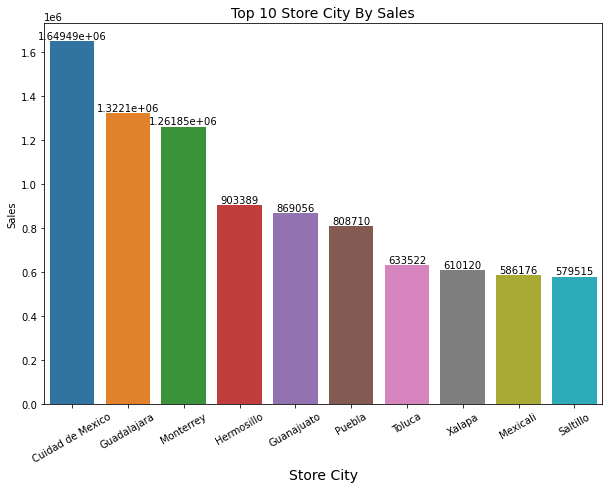

In [285]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=top_10_city_sale,x=top_10_city_sale['Store_City'],y=top_10_city_sale['Sales'])
plt.title('Top 10 Store City By Sales',fontsize=14)
plt.xticks(rotation=30)
plt.xlabel('Store City',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
Bottom 5 Store City By Sales

In [286]:
bottom_5_city_sale=df.groupby("Store_City")['Sales'].sum().sort_values(ascending=False).reset_index()[-5:]
bottom_5_city_sale

,Store_City,Sales
24,Zacatecas,229983.04
25,Tuxtla Gutierrez,229698.27
26,Durango,222318.78
27,Cuernavaca,221587.26
28,La Paz,210897.83


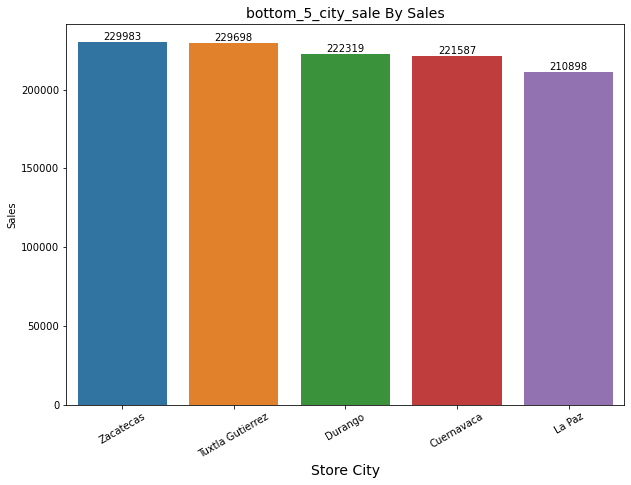

In [287]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=bottom_5_city_sale,x=bottom_5_city_sale['Store_City'],y=bottom_5_city_sale['Sales'])
plt.title('bottom_5_city_sale By Sales',fontsize=14)
plt.xticks(rotation=30)
plt.xlabel('Store City',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Month wise Profit Each Store Location

In [255]:
data=df.groupby(['Month','Store_Location'])['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
data

,Month,Store_Location,Profit
30,March,Downtown,227477.0
26,June,Downtown,223214.0
2,April,Downtown,222850.0
34,May,Downtown,222380.0
18,January,Downtown,214590.0
22,July,Downtown,206203.0
46,September,Downtown,199004.0
14,February,Downtown,197182.0
6,August,Downtown,187493.0
10,December,Downtown,140242.0


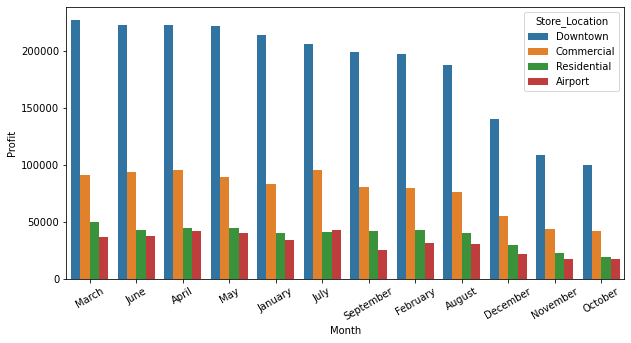

In [259]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=data,x=data['Month'],y=data['Profit'],hue=data['Store_Location'])
plt.xticks(rotation=30);
#for i in ax.containers:
    #ax.bar_label(i,);

In [288]:
df.head(2)

,Sale_ID,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Sales,Year,Day,Month,Cost,Profit
0,1,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,12.99,2017,Sunday,January,9.99,3.0
1,2,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,15.99,2017,Sunday,January,9.99,6.0


Store Location by Transiction

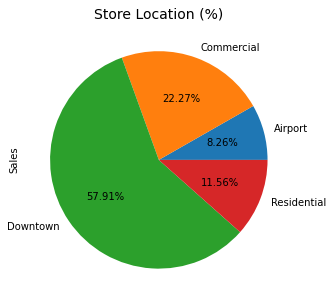

In [300]:
plt.figure(figsize=(10,5))
df.groupby('Store_Location')['Sales'].count().plot(kind='pie',autopct='%0.2f%%')
plt.title('Store Location (%)',fontsize=14);

Pivot Table

In [310]:
pivot=pd.pivot_table(data=df,index=['Month','Store_Location'],columns=['Product_Category'],values=['Sales','Profit'],aggfunc='sum',margins=True).reset_index()
pivot

Month Store_Location       Profit                        \
Product_Category                           Art & Crafts Electronics     Games   
0                     April        Airport       6614.0     12496.0   10543.0   
1                     April     Commercial      16429.0     29414.0   13873.0   
2                     April       Downtown      43442.0     47105.0   35192.0   
3                     April    Residential      10486.0      9613.0    6807.0   
4                    August        Airport       4246.0      7128.0    7093.0   
5                    August     Commercial      12500.0     28840.0   10497.0   
6                    August       Downtown      36283.0     46316.0   29516.0   
7                    August    Residential       7022.0     10353.0    5374.0   
8                  December        Airport       4640.0      5869.0    4135.0   
9                  December     Commercial      11488.0     12289.0   12709.0   
10                 December       Downtown      33358.0     20966.0   30867.0   
11                 December    Residential       7137.0      5636.0    4673.0   
12                 February        Airport       5055.0      9653.0    8087.0   
13                 February     Commercial      11135.0     29876.0   11990.0   
14                 February       Downtown      36446.0     52544.0   34611.0   
15                 February    Residential       6600.0     11849.0    6834.0   
16                  January        Airport       4465.0     13107.0    7242.0   
17                  January     Commercial      12242.0     29685.0   14912.0   
18                  January       Downtown      36877.0     57681.0   40526.0   
19                  January    Residential       7042.0     10267.0    7452.0   
20                     July        Airport       7581.0     10874.0    7681.0   
21                     July     Commercial      16979.0     27984.0   16375.0   
22                     July       Downtown      37632.0     45393.0   37787.0   
23                     July    Residential       9277.0      8538.0    5520.0   
24                     June        Airport       4331.0      8911.0    8590.0   
25                     June     Commercial      14550.0     27033.0   14657.0   
26                     June       Downtown      40614.0     46085.0   35704.0   
27                     June    Residential       7785.0      7712.0    6707.0   
28                    March        Airport       4965.0     11156.0    8696.0   
29                    March     Commercial      14089.0     29335.0   13519.0   
30                    March       Downtown      42371.0     55969.0   35289.0   
31                    March    Residential       9938.0     10585.0    7482.0   
32                      May        Airport       6323.0     11544.0    7042.0   
33                      May     Commercial      15028.0     24853.0   13998.0   
34                      May       Downtown      44502.0     47056.0   32369.0   
35                      May    Residential      10179.0      8141.0    6945.0   
36                 November        Airport       4351.0      4556.0    3480.0   
37                 November     Commercial       7331.0     13409.0    6975.0   
38                 November       Downtown      25848.0     19755.0   19881.0   
39                 November    Residential       4379.0      5962.0    2539.0   
40                  October        Airport       3692.0      6493.0    3009.0   
41                  October     Commercial       5588.0     13753.0    6219.0   
42                  October       Downtown      17902.0     22782.0   18959.0   
43                  October    Residential       2575.0      5647.0    3128.0   
44                September        Airport       5178.0      6410.0    5170.0   
45                September     Commercial      18102.0     21103.0   10572.0   
46                September       Downtown      49045.0     40838.0   27720.0   
47                September    Residential       9712

Conclusion:
1. Total Sales 14444572.35
2. Total Profit 4014029.0
3. Profit Margin 27.79%
4. Gross Profit 4014029.0
5. Highest Sales April month and highest Profit March.Lowest sales & Profit october Month.
6. Highest Sales & Profit Sunday.Lowest sales & Profit Tuesday.
7. A trend is observed that there are more trades on closing days and higher profit margins on those days.
8. Toys product categories drive the biggest profits & Sales. Sports & Outdoor 
   product categories drive the lowest profits & Sales.
9. Cuidad de Mexico Store City is the highest Sales Drive and Lowest is La Paz.
10. Highest(57.91%) Transcitaion Store Location is Downtown which and Lowest(8.26%) is Airport.